In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


# Load raw data and merge train-test sets

In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train.shape

(1460, 81)

In [3]:
X = train.drop(['Id','SalePrice'], axis=1)
#y = train.SalePrice
y = np.log1p(train["SalePrice"])
test_id = test.Id
X_test = test.drop(['Id'], axis=1)
data = pd.concat([X,X_test],axis=0)
data.reset_index(drop=True, inplace=True)
data.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2918,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [4]:
#data.info()

# Imputing missing data

## Check missing data

In [5]:
def missing_terms(df):
    missingt = data.isnull().sum().sort_values(ascending=False)
    print('Missing features count: ',missingt[missingt>0].count(),missingt[missingt>0])
    return missingt[missingt>0]

def missing_terms_column(df):
    cols = list(df)
    missing_cols = []
    for i in range(0, len(cols)):
        tmp1 = df[cols[i]].isnull().sum()
        if tmp1>0:
            missing_cols.append(cols[i])
    return missing_cols
        

    
missingt = missing_terms(data)
missingc = missing_terms_column(data)
missingc

Missing features count:  34 PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior1st        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64


['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

Text(0.5, 1.0, 'Missing Features')

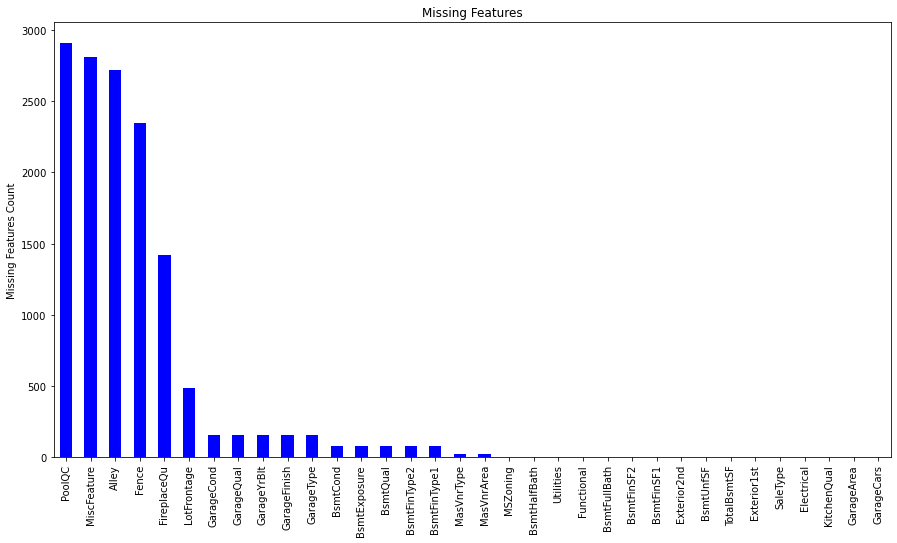

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

missingt.plot(kind='bar', color='b', figsize=(15,8))
plt.ylabel('Missing Features Count')
plt.title('Missing Features')

## Imupting Missing Values Table

| Features | Variable Type | Special Notes | Imputing Method |
| --- | --- | --- | --- |
| MSZoning | categorical | None | mode |
| Utilities | categorical | Allpub | mode |
| Exterior1st | categorical | None | mode |
| Exterior2nd | categorical | None | mode |
| Electrical | categorical | None | mode |
| BsmtFullBath | categorical | None | fill with 0 |
| BsmtHalfBath | categorical | None | fill with 0 |
| KitchenQual | categorical | None | mode |
| GarageYrBlt | categorical | None | fill with 0 |
| GarageCars | categorical | None | fill with 0 |
| SaleType | categorical | None | mode |
| MasVnrType | categorical | None	None | fill with None |
| Alley | categorical | NA 	No alley access | fill with None |
| BsmtQual | categorical | NA	No Basement | fill with None |
| BsmtCond | categorical | NA	No Basement | fill with None |
| BsmtExposure | categorical | NA	No Basement | fill with None |
| BsmtFinType1 | categorical | NA	No Basement | fill with None |
| BsmtFinType2 | categorical | NA	No Basement | fill with None |
| FireplaceQu | categorical | NA	No Fireplace | fill with None |
| GarageType | categorical | NA	No Garage | fill with None |
| GarageFinish | categorical | NA	No Garage | fill with None |
| GarageQual | categorical | NA	No Garage | fill with None |
| GarageCond | categorical | NA	No Garage | fill with None |
| PoolQC | categorical | NA	No Pool | fill with None |
| Fence | categorical | NA	No Fence | fill with None |
| MiscFeature | categorical | NA	No None | fill with None |
| MasVnrArea | numerical | None | fill with 0 |
| GarageArea | numerical | None | fill with 0 |
| BsmtFinSF1 | categorical | None | fill with 0 |
| LotFrontage | numerical | None | median |
| BsmtFinSF2 | categorical | None | fill with 0  |
| BsmtUnfSF | categorical | None | fill with 0 |
| TotalBsmtSF | categorical | None | fill with 0 |
| Functional | categorical | Assume typical unless deductions are warranted | fill with Typ |

In [7]:
import seaborn as sns

#corr = data.corr()
#plt.subplots(figsize=(15,15))
#sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)],cmap='viridis',vmax=1.0,vmin=-1.0,linewidths=0.05,annot=True, annot_kws={"size": 5}, square=True)

## Fill missing data based on data description

In [8]:
def fill_missing(df):
    
    
    
    # fill categorical missing values without special notes
    data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
    data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0]) 
    data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0]) 
    data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
    data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])  
    
    # fill with special meaning
    data['Functional'] = data['Functional'].fillna('Typ')
    data['Utilities'] = data['Utilities'].fillna('AllPub')
    missing_val_col2 = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageArea','GarageCars','MasVnrArea']
    for i in missing_val_col2:
        data[i] = data[i].fillna(0)
        
    cmvs = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
           'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','MasVnrType']
    for i in cmvs:
        data[i].fillna("None", inplace=True)    
        
    ## Replaced all missing values in LotFrontage by imputing the median value of each neighborhood. 
    data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.median()))             
    data['MSZoning'] = data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))    
        
        
        
    
    
    return df


data = fill_missing(data)

In [9]:
missingt = missing_terms(data)
missingc = missing_terms_column(data)
missingc

Missing features count:  0 Series([], dtype: int64)


[]

# Identifying Outliers

In [10]:
(train.corr())["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

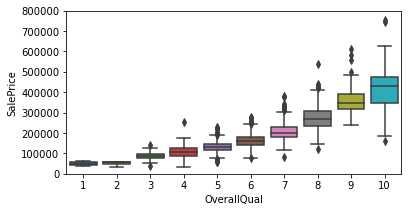

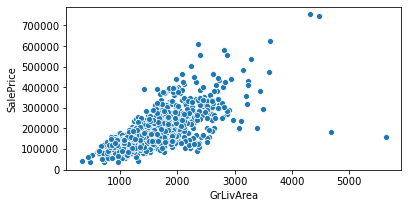

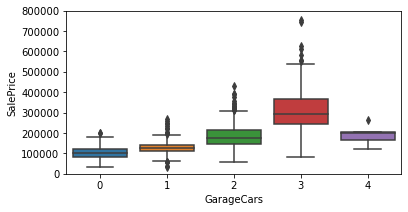

In [11]:
tmp_data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(6, 3))
fig = sns.boxplot(x=train['OverallQual'], y="SalePrice", data=tmp_data)
fig.axis(ymin=0, ymax=800000);

plt.subplots(figsize = (6,3))
sns.scatterplot(y = train['SalePrice'], x = train['GrLivArea']);


tmp_data = pd.concat([train['SalePrice'], train['GarageCars']], axis=1)
f, ax = plt.subplots(figsize=(6, 3))
fig = sns.boxplot(x=train['GarageCars'], y="SalePrice", data=tmp_data)
fig.axis(ymin=0, ymax=800000);

In [12]:
## Remove outliers
#data.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)
#data.drop(train[(train['GrLivArea']>4500) & (train['SalePrice']<300000)].index, inplace=True)
#data.reset_index(drop=True, inplace=True)
#data.shape

In [13]:
#n_to_s= ['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','LowQualFinSF','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGr#d','Fireplaces','MoSold','YrSold']
#for i in n_to_s:
#    data[i]=data[i].astype(str)

# Check and Normalize numerical skewed features

## Check numerical skewed features

In [14]:
#n_to_s = ['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','LowQualFinSF','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','MoSold','YrSold']
#for i in n_to_s:
#    data[i]=data[i].astype(str)

data['MSSubClass'] = data['MSSubClass'].apply(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)
data = data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

In [15]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in data.columns:
    if data[i].dtype in numeric_dtypes:
        numeric.append(i)
print(len(numeric))
numeric

33


['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [16]:
#def plot_numeic_features(feature_set, feature, nx, ny, px, py):#
#
#    skewness = feature_set['{}'.format(feature)].skew().round(3)
#    plt.subplot2grid((nx,ny),(px,py))
#    feature_set['{}'.format(feature)].value_counts().plot(kind='kde', alpha=1)
#    plt.title('{} distribution'.format(feature))
#    plt.legend(['Skewness {:.3f}'.format(skewness)],loc='best')
#    
#    return
#
#anumeric = np.asarray(numeric).reshape((3, 6))
#
#
#fig = plt.figure(figsize=(25,10))#
#
#nx=3
#ny=6
#for i in range(3):
#    for j in range(6):
#        plot_numeic_features(data, anumeric[i][j], nx, ny, i, j)
#        
#plt.show()
#    
#    
from scipy.stats import skew, norm
skew_features = data[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)
skew_index = skew_features[abs(skew_features) > 0.5].index
print("There are {} numerical features with Skew > 0.5 :".format(skew_features[abs(skew_features) > 0.5].shape[0]))
skewness_set = pd.DataFrame({'Skew' :skew_features[abs(skew_features) > 0.5]})
skew_features


There are 27 numerical features with Skew > 0.5 :


MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
MasVnrArea        2.613592
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.505704
1stFlrSF          1.469604
BsmtFinSF1        1.425230
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
BedroomAbvGr      0.326324
GarageArea        0.239257
OverallQual       0.197110
FullBath          0.167606
GarageCars       -0.219581
YearRemodAdd     -0.451020
YearBuilt        -0.599806
GarageYrBlt      -3.906205
dtype: float64

## Normalize numerical skewed features using boxcox method

In [17]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

def dis_trans(feature_set,features_index):
    for col in features_index:
        feature_set['{}'.format(col)] = boxcox1p(feature_set['{}'.format(col)], boxcox_normmax(feature_set['{}'.format(col)] + 1))
    return feature_set

data = dis_trans(data,skew_index)

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [18]:
#fig = plt.figure(figsize=(25,10))
#
#nx=3
#ny=6
#for i in range(3):
#    for j in range(6):
#        plot_numeic_features(data, anumeric[i][j], nx, ny, i, j)
#        
#plt.show()
#    
#    
#skew_features = data[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)
#print("There are {} numerical features with Skew > 0.5 :".format(skew_features[abs(skew_features) > 0.5].shape[0]))
#skew_features.head()


In [19]:
data.shape

(2919, 76)

In [20]:
#data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
#data['YrBltAndRemod'] = data['YearBuilt'] + data['YearRemodAdd']
#data['Total_sqr_footage'] = data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['1stFlrSF'] + data['2ndFlrSF']                                                                
#data['Total_Bathrooms'] = data['FullBath'] + (0.5 * data['HalfBath']) + data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath'])                                                             
#data['Total_porch_sf'] = data['OpenPorchSF'] + data['3SsnPorch'] + data['EnclosedPorch'] + data['ScreenPorch'] + data['WoodDeckSF']                            
#data['haspool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
#data['has2ndfloor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
#data['hasgarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
#data['hasbsmt'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
#data['hasfireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [21]:
data.shape

(2919, 76)

# Convert categorical features to indicator variables

In [22]:
data = pd.get_dummies(data).reset_index(drop=True)
data.shape

(2919, 324)

In [23]:
data

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,14.663551,13.424521,7,3.989638,3.035278e+51,2003,19.378556,117.855863,0.0,30.016553,...,0,0,0,1,0,0,0,0,1,0
1,16.494888,13.694527,6,5.996436,2.444561e+51,1976,0.000000,146.805798,0.0,44.178886,...,0,0,0,1,0,0,0,0,1,0
2,15.044952,14.034134,7,3.989638,2.987303e+51,2002,17.721067,91.575284,0.0,56.957792,...,0,0,0,1,0,0,0,0,1,0
3,14.008495,13.683421,7,3.989638,1.482589e+51,1970,0.000000,52.776367,0.0,64.881732,...,0,0,0,1,1,0,0,0,0,0
4,16.954473,14.550142,8,3.989638,2.963583e+51,2000,25.323124,112.040325,0.0,61.233854,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,7.529561,10.503897,4,5.345039,2.328832e+51,1970,0.000000,0.000000,0.0,65.309789,...,0,0,0,1,0,0,0,0,1,0
2915,7.529561,10.463055,4,3.989638,2.328832e+51,1970,0.000000,58.629117,0.0,45.107589,...,0,0,0,1,1,0,0,0,0,0
2916,24.243477,15.304041,5,5.345039,2.147291e+51,1996,0.000000,170.730556,0.0,0.000000,...,0,0,0,1,1,0,0,0,0,0
2917,14.273561,13.873787,5,3.989638,2.780078e+51,1992,0.000000,71.447840,0.0,67.351587,...,0,0,0,1,0,0,0,0,1,0


# Remove outliers

In [24]:
X = data.iloc[:len(y), :]
X_test = data.iloc[len(y):, :]
X.shape, y.shape, X_test.shape

((1460, 324), (1460,), (1459, 324))

In [25]:
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)
X = X.drop(overfit, axis=1)
X_test = X_test.drop(overfit, axis=1)

# Machine Learning

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA


from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, StackingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Lasso, Ridge, RidgeCV, LinearRegression, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

## Setup cross-validation groups

In [27]:
kf = KFold(n_splits=8, random_state=42, shuffle=True)

## Define model evaluation index

In [28]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

## Basic ML models

In [29]:
estimators =  [('LR',LinearRegression()),('RG',Ridge()),('LA',Lasso()),('EN',ElasticNet()),('SV',SVR()),('XG',XGBRegressor())]
models = [LinearRegression(),Ridge(),Lasso(),ElasticNet(),SVR(),XGBRegressor()]
names = ['LR','RG','LA','EN','SV','XG']

In [30]:
for name, model in zip(names, models):
    score = cv_rmse(model, X, y)
    print("{}: {:.5f}, {:.5f}".format(name,score.mean(),score.std()))

LR: 0.30761, 0.00891
RG: 0.12732, 0.03957


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.81726e-117): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.55839e-117): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.36021e-117): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.03176e-116): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.38574e-117): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: 

LA: 0.20669, 0.03906


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.55860132354083, tolerance: 0.019973681362766487
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.76955906086736, tolerance: 0.020156028668346978
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.88484992506287, tolerance: 0.02007759126562702
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.7

EN: 0.19984, 0.04162
SV: 0.31118, 0.00850
XG: 0.14016, 0.03423


## Tuning hyperparameters for basic ML models

In [31]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [32]:
RG = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kf))
LA = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kf))
EN = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kf, l1_ratio=e_l1ratio))                                
SV = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))
XG = XGBRegressor(learning_rate=0.01,n_estimators=5000,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00005)

In [33]:
score = cv_rmse(RG,X,y)
print("RG: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = cv_rmse(LA,X,y)
print("LA: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = cv_rmse(EN,X,y)
print("EN: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = cv_rmse(SV,X,y)
print("SV: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = cv_rmse(XG,X,y)
print("XG: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

RG: 0.1239 (0.0410)

LA: 0.1208 (0.0402)

EN: 0.1210 (0.0402)

SV: 0.1197 (0.0432)

[04:08:32] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[04:09:26] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[04:09:26] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[04:10:21] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[04:10:22] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[04:11:16] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[04:11:16] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[04:12:11] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now depre

In [34]:
#def hyper_tuning(model, params, X, y):
#    gs = GridSearchCV(model,params,cv=5, scoring="neg_mean_squared_error")
#    gs.fit(X,y)
#    print(gs.best_params_, np.sqrt(-gs.best_score_))

In [35]:
#hyper_tuning(Lasso(), {'alpha': [0.0005,0.0006,0.0007],'max_iter':[20000,50000]}, X,y)
#{'alpha': 0.0006, 'max_iter': 20000} 0.12748202843809667
#{'alpha': 0.0006, 'max_iter': 50000} 0.12419983225812681

In [36]:
#hyper_tuning(Ridge(), {'alpha': [7.2,7.3,7.4,7.5,7.6,7.7,7.8]}, X,y)
#{'alpha': 7.2} 0.13202684068761514
#{'alpha': 7.5} 0.12831986409928892

In [37]:
#hyper_tuning(ElasticNet(), {'alpha':[0.0005,0.0008,0.0009],'l1_ratio':[0.4,0.5],'max_iter':[20000]}, X,y)
#{'alpha': 0.0008, 'l1_ratio': 0.7, 'max_iter': 50000} 0.12748012686115465
#{'alpha': 0.0008, 'l1_ratio': 0.7, 'max_iter': 20000} 0.12748012686115467
#{'alpha': 0.0008, 'l1_ratio': 0.5, 'max_iter': 20000} 0.12397932311532185

In [38]:
#hyper_tuning(XGBRegressor(), {'learning_rate':[0.05,0.1,0.2],"n_estimators":[1000,2000,3000], 'max_depth':[3,5,7],'objective':['reg:linear'],'nthread':[-1], 'subsample':[0.7,0.8],'reg_alpha':[0.00001,0.00005,0.0001]}, X,y)

In [39]:
#LA = Lasso(alpha=0.0006,max_iter=50000)
#RG = Ridge(alpha=7.5)
#EN = ElasticNet(alpha=0.0008, l1_ratio=0.5, max_iter=20000)
#XG = XGBRegressor(learning_rate=0.01,n_estimators=3000,
#                                     max_depth=3, min_child_weight=0,
#                                     gamma=0, subsample=0.7,
#                                     colsample_bytree=0.7,
#                                     objective='reg:linear', nthread=-1,
#                                     scale_pos_weight=1, seed=27,
#                                     reg_alpha=0.00005)

## Stacked generalization model

In [40]:
STACK = StackingCVRegressor(regressors=(LA, RG, EN, SV, XG),
                                meta_regressor=XG,
                                use_features_in_secondary=True)

In [41]:
LA_fit = LA.fit(X,y)
RG_fit = RG.fit(X,y)
EN_fit = EN.fit(X,y)
SV_fit = SV.fit(X,y)
XG_fit = XG.fit(X,y)
STACK_fit = STACK.fit(np.array(X), np.array(y))

[04:15:56] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:59] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:21] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:11] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:11] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:00] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:01] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:50] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:50] WARNING: ../src/objective/regression_

RG: 0.1239 (0.0410)

LA: 0.1208 (0.0402)

EN: 0.1210 (0.0402)

SV: 0.1197 (0.0432)

XG: 0.1211 (0.0334)

In [42]:
def blending_pred(X):
    return ((0.1 * EN_fit.predict(X)) + \
            (0.1 * LA_fit.predict(X)) + \
            (0.1 * RG_fit.predict(X)) + \
            (0.2 * XG_fit.predict(X)) + \
            (0.1 * SV_fit.predict(X)) + \
            (0.4 * STACK_fit.predict(np.array(X))))

In [43]:
print('RMSLE score on train data:')
print(rmsle(y, blending_pred(X)))

RMSLE score on train data:
0.0584323994405725


# Submission

In [44]:
print('Predict submission')
submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(blending_pred(X_test)))

Predict submission


In [45]:
q1 = submission['SalePrice'].quantile(0.005)
q2 = submission['SalePrice'].quantile(0.995)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
submission.to_csv("submission.csv", index=False)